# The goal of this is code is to get heatmap of similarities between economic industries based on wikipedia textual data

In [11]:
import requests
from bs4 import BeautifulSoup
from pprint import pprint

#The library requests allows us to web scrape content
#BeautifulSoup parses html and makes navigating it much easier

r = requests.get("https://en.wikipedia.org/wiki/S%26P_100")
soup = BeautifulSoup(r.content, 'html.parser')

In [13]:
#The prettify function allows for easier viewing of the data
pprint(soup.prettify())

('<!DOCTYPE html>\n'
 '<html class="client-nojs" dir="ltr" lang="en">\n'
 ' <head>\n'
 '  <meta charset="utf-8"/>\n'
 '  <title>\n'
 '   S&amp;P 100 - Wikipedia\n'
 '  </title>\n'
 '  <script>\n'
 '   '
 'document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"d763a3a6-11df-4079-baf8-a1955ab385a1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"S\\u0026P_100","wgTitle":"S\\u0026P '
 '100","wgCurRevisionId":1025160498,"wgRevisionId":1025160498,"wgArticleId":2658424,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles '
 'with short description","Short description matches Wikidata","American stock '
 'market 

 '         </td>\n'
 '         <td>\n'
 '          <a href="/wiki/Nike,_Inc." title="Nike, Inc.">\n'
 '           Nike, Inc.\n'
 '          </a>\n'
 '         </td>\n'
 '         <td>\n'
 '          Consumer Discretionary\n'
 '         </td>\n'
 '        </tr>\n'
 '        <tr>\n'
 '         <td>\n'
 '          NVDA\n'
 '         </td>\n'
 '         <td>\n'
 '          <a href="/wiki/Nvidia" title="Nvidia">\n'
 '           Nvidia Corporation\n'
 '          </a>\n'
 '         </td>\n'
 '         <td>\n'
 '          Information Technology\n'
 '         </td>\n'
 '        </tr>\n'
 '        <tr>\n'
 '         <td>\n'
 '          ORCL\n'
 '         </td>\n'
 '         <td>\n'
 '          <a href="/wiki/Oracle_Corporation" title="Oracle Corporation">\n'
 '           Oracle Corporation\n'
 '          </a>\n'
 '         </td>\n'
 '         <td>\n'
 '          Information Technology\n'
 '         </td>\n'
 '        </tr>\n'
 '        <tr>\n'
 '         <td>\n'
 '          PEP\n'
 '         </t

 '      <h2>\n'
 '       <span class="mw-headline" id="References">\n'
 '        References\n'
 '       </span>\n'
 '       <span class="mw-editsection">\n'
 '        <span class="mw-editsection-bracket">\n'
 '         [\n'
 '        </span>\n'
 '        <a href="/w/index.php?title=S%26P_100&amp;action=edit&amp;section=8" '
 'title="Edit section: References">\n'
 '         edit\n'
 '        </a>\n'
 '        <span class="mw-editsection-bracket">\n'
 '         ]\n'
 '        </span>\n'
 '       </span>\n'
 '      </h2>\n'
 '      <style data-mw-deduplicate="TemplateStyles:r1011085734">\n'
 '       .mw-parser-output '
 '.reflist{font-size:90%;margin-bottom:0.5em;list-style-type:decimal}.mw-parser-output '
 '.reflist '
 '.references{font-size:100%;margin-bottom:0;list-style-type:inherit}.mw-parser-output '
 '.reflist-columns-2{column-width:30em}.mw-parser-output '
 '.reflist-columns-3{column-width:25em}.mw-parser-output '
 '.reflist-columns{margin-top:0.3em}.mw-parser-output .reflist-colu

In [14]:
#We can look for a certain element using find
#It will return the first one
title = soup.find('title')
print(title)

<title>S&amp;P 100 - Wikipedia</title>


In [15]:
#The find_all function finds all applicable elements
tables = soup.find_all('table')
print(len(tables))
print()
print()
print(tables[0].prettify())

4


<table class="infobox vcard">
 <caption class="infobox-title fn n org">
  S&amp;P 100
 </caption>
 <tbody>
  <tr>
   <th class="infobox-label" scope="row">
    Foundation
   </th>
   <td class="infobox-data">
    June 15, 1983
    <span class="noprint">
     ; 38 years ago
    </span>
    <span style="display:none">
     (
     <span class="bday dtstart published updated">
      1983-06-15
     </span>
     )
    </span>
    <sup class="reference" id="cite_ref-S&amp;P500_1-0">
     <a href="#cite_note-S&amp;P500-1">
      [1]
     </a>
    </sup>
   </td>
  </tr>
  <tr>
   <th class="infobox-label" scope="row">
    Operator
   </th>
   <td class="infobox-data">
    <a href="/wiki/S%26P_Dow_Jones_Indices" title="S&amp;P Dow Jones Indices">
     S&amp;P Dow Jones Indices
    </a>
    <sup class="reference" id="cite_ref-S&amp;P500Details_2-0">
     <a href="#cite_note-S&amp;P500Details-2">
      [2]
     </a>
    </sup>
   </td>
  </tr>
  <tr>
   <th class="infobox-label" scope="row">

In [16]:
#We can also search by class in addition to element
#For example, let's get only sortable tables
sortable_tables = soup.findAll("table", {"class": "sortable"})
print(len(sortable_tables))
print()
print()
print(sortable_tables[0].prettify())

2


<table class="wikitable sortable" id="constituents">
 <tbody>
  <tr>
   <th>
    Symbol
   </th>
   <th>
    Name
   </th>
   <th>
    Sector
   </th>
  </tr>
  <tr>
   <td>
    AAPL
   </td>
   <td>
    <a href="/wiki/Apple_Inc." title="Apple Inc.">
     Apple Inc.
    </a>
   </td>
   <td>
    Information Technology
   </td>
  </tr>
  <tr>
   <td>
    ABBV
   </td>
   <td>
    <a class="mw-redirect" href="/wiki/AbbVie_Inc." title="AbbVie Inc.">
     AbbVie Inc.
    </a>
   </td>
   <td>
    Health Care
   </td>
  </tr>
  <tr>
   <td>
    ABT
   </td>
   <td>
    <a href="/wiki/Abbott_Laboratories" title="Abbott Laboratories">
     Abbott Laboratories
    </a>
   </td>
   <td>
    Health Care
   </td>
  </tr>
  <tr>
   <td>
    ACN
   </td>
   <td>
    <a href="/wiki/Accenture" title="Accenture">
     Accenture
    </a>
   </td>
   <td>
    Information Technology
   </td>
  </tr>
  <tr>
   <td>
    ADBE
   </td>
   <td>
    <a href="/wiki/Adobe_Inc." title="Adobe Inc.">
     Adobe

In [17]:
#We can see certain attributes of an element easily
example_table = sortable_tables[0]
#For example, the classes through attrs
print(example_table.attrs)
print()
print(example_table.attrs["class"])

{'class': ['wikitable', 'sortable'], 'id': 'constituents'}

['wikitable', 'sortable']


In [18]:
#Or just the text through the text attribute
print(example_table.text)



Symbol

Name

Sector


AAPL

Apple Inc.

Information Technology


ABBV

AbbVie Inc.

Health Care


ABT

Abbott Laboratories

Health Care


ACN

Accenture

Information Technology


ADBE

Adobe Inc.

Information Technology


AIG

American International Group

Financials


AMGN

Amgen Inc.

Health Care


AMT

American Tower

Real Estate


AMZN

Amazon.com

Consumer Discretionary


AVGO

Broadcom Inc.

Information Technology


AXP

American Express

Financials


BA

Boeing Co.

Industrials


BAC

Bank of America

Financials


BIIB

Biogen

Health Care


BK

The Bank of New York Mellon

Financials


BKNG

Booking Holdings

Consumer Discretionary


BLK

BlackRock Inc.

Financials


BMY

Bristol-Myers Squibb

Health Care


BRK.B

Berkshire Hathaway

Financials


C

Citigroup Inc.

Financials


CAT

Caterpillar Inc.

Industrials


CHTR

Charter Communications

Communication Services


CL

Colgate-Palmolive

Consumer Staples


CMCSA

Comcast Corp.

Communication Services


COF

Capital One Fi

In [19]:
#Let's see if there is an easy way to identify which table is the list of the S&P 100 by class
sortable_table_classes = [table.attrs["class"] for table in sortable_tables]
for class_list in sortable_table_classes:
    print(class_list)
#They are the same, we will need to do something else

['wikitable', 'sortable']
['wikitable', 'sortable']


In [20]:
#Let's say we are certain the word Apple Inc. will only be in the table
apple_text_elements = soup.findAll(text='Apple Inc.')
print(apple_text_elements)
assert len(apple_text_elements) == 1
print()
print("Only one element with the text Apple Inc.")

['Apple Inc.']

Only one element with the text Apple Inc.


In [21]:
#It might look like a string, but if you look at the type you will see it is not
print(type(apple_text_elements[0]))

<class 'bs4.element.NavigableString'>


In [22]:
apple_element = apple_text_elements[0]
#The parent attribute gives you the element which contains the current element
print(apple_element.parent)

<a href="/wiki/Apple_Inc." title="Apple Inc.">Apple Inc.</a>


In [23]:
#Getting the parent of the hyperlink, we are now in the <td> tag
print(apple_element.parent.parent)

<td><a href="/wiki/Apple_Inc." title="Apple Inc.">Apple Inc.</a>
</td>


In [24]:
#Then the row
print(apple_element.parent.parent.parent)

<tr>
<td>AAPL
</td>
<td><a href="/wiki/Apple_Inc." title="Apple Inc.">Apple Inc.</a>
</td>
<td>Information Technology
</td></tr>


In [25]:
#Then finally the body of the table
print(apple_element.parent.parent.parent.parent)

<tbody><tr>
<th>Symbol
</th>
<th>Name
</th>
<th>Sector
</th></tr>
<tr>
<td>AAPL
</td>
<td><a href="/wiki/Apple_Inc." title="Apple Inc.">Apple Inc.</a>
</td>
<td>Information Technology
</td></tr>
<tr>
<td>ABBV
</td>
<td><a class="mw-redirect" href="/wiki/AbbVie_Inc." title="AbbVie Inc.">AbbVie Inc.</a>
</td>
<td>Health Care
</td></tr>
<tr>
<td>ABT
</td>
<td><a href="/wiki/Abbott_Laboratories" title="Abbott Laboratories">Abbott Laboratories</a>
</td>
<td>Health Care
</td></tr>
<tr>
<td>ACN
</td>
<td><a href="/wiki/Accenture" title="Accenture">Accenture</a>
</td>
<td>Information Technology
</td></tr>
<tr>
<td>ADBE
</td>
<td><a href="/wiki/Adobe_Inc." title="Adobe Inc.">Adobe Inc.</a>
</td>
<td>Information Technology
</td></tr>
<tr>
<td>AIG
</td>
<td><a href="/wiki/American_International_Group" title="American International Group">American International Group</a>
</td>
<td>Financials
</td></tr>
<tr>
<td>AMGN
</td>
<td><a href="/wiki/Amgen" title="Amgen">Amgen Inc.</a>
</td>
<td>Health Care

In [26]:
#You can also query for a certain parent with a tag like below
print(apple_element.find_parent('tbody'))

<tbody><tr>
<th>Symbol
</th>
<th>Name
</th>
<th>Sector
</th></tr>
<tr>
<td>AAPL
</td>
<td><a href="/wiki/Apple_Inc." title="Apple Inc.">Apple Inc.</a>
</td>
<td>Information Technology
</td></tr>
<tr>
<td>ABBV
</td>
<td><a class="mw-redirect" href="/wiki/AbbVie_Inc." title="AbbVie Inc.">AbbVie Inc.</a>
</td>
<td>Health Care
</td></tr>
<tr>
<td>ABT
</td>
<td><a href="/wiki/Abbott_Laboratories" title="Abbott Laboratories">Abbott Laboratories</a>
</td>
<td>Health Care
</td></tr>
<tr>
<td>ACN
</td>
<td><a href="/wiki/Accenture" title="Accenture">Accenture</a>
</td>
<td>Information Technology
</td></tr>
<tr>
<td>ADBE
</td>
<td><a href="/wiki/Adobe_Inc." title="Adobe Inc.">Adobe Inc.</a>
</td>
<td>Information Technology
</td></tr>
<tr>
<td>AIG
</td>
<td><a href="/wiki/American_International_Group" title="American International Group">American International Group</a>
</td>
<td>Financials
</td></tr>
<tr>
<td>AMGN
</td>
<td><a href="/wiki/Amgen" title="Amgen">Amgen Inc.</a>
</td>
<td>Health Care

In [27]:
#With this table, we can find all rows first
table = apple_element.find_parent('tbody')
table_rows = table.find_all("tr")
print(len(table_rows))
print()
print(table_rows[0])
print()
print(table_rows[1])

102

<tr>
<th>Symbol
</th>
<th>Name
</th>
<th>Sector
</th></tr>

<tr>
<td>AAPL
</td>
<td><a href="/wiki/Apple_Inc." title="Apple Inc.">Apple Inc.</a>
</td>
<td>Information Technology
</td></tr>


In [28]:
#We could iterate through each row and grab the second element
#But it is just as clean to go straight for hyperlinks by selecting only the a elements
links = table.find_all('a')
print(len(links))
print(links[0])

101
<a href="/wiki/Apple_Inc." title="Apple Inc.">Apple Inc.</a>


In [29]:
#The attributes of each link holds the linked page
example_link = links[0]
print(example_link.attrs)
print()
print(example_link.attrs["href"])

{'href': '/wiki/Apple_Inc.', 'title': 'Apple Inc.'}

/wiki/Apple_Inc.


In [30]:
#Let's convert the links list to be the actual links
links = [link.attrs["href"] for link in links]
print(links)

['/wiki/Apple_Inc.', '/wiki/AbbVie_Inc.', '/wiki/Abbott_Laboratories', '/wiki/Accenture', '/wiki/Adobe_Inc.', '/wiki/American_International_Group', '/wiki/Amgen', '/wiki/American_Tower', '/wiki/Amazon.com', '/wiki/Broadcom_Inc.', '/wiki/American_Express', '/wiki/Boeing', '/wiki/Bank_of_America', '/wiki/Biogen', '/wiki/The_Bank_of_New_York_Mellon', '/wiki/Booking_Holdings', '/wiki/BlackRock', '/wiki/Bristol-Myers_Squibb', '/wiki/Berkshire_Hathaway', '/wiki/Citigroup', '/wiki/Caterpillar_Inc.', '/wiki/Charter_Communications', '/wiki/Colgate-Palmolive', '/wiki/Comcast', '/wiki/Capital_One', '/wiki/ConocoPhillips', '/wiki/Costco_Wholesale_Corp.', '/wiki/Salesforce', '/wiki/Cisco_Systems', '/wiki/CVS_Health', '/wiki/Chevron_Corporation', '/wiki/DuPont', '/wiki/Danaher_Corporation', '/wiki/The_Walt_Disney_Company', '/wiki/Dow_Inc.', '/wiki/Duke_Energy', '/wiki/Emerson_Electric', '/wiki/Exelon', '/wiki/Ford_Motor_Company', '/wiki/Facebook,_Inc.', '/wiki/FedEx', '/wiki/General_Dynamics', '/wik

In [31]:
#Because of the potential for there to be two share classes, we should check duplicates

import numpy as np
links_unique, link_counts = np.unique(links, return_counts=True)
print(links_unique)
print(link_counts)

['/wiki/3M' '/wiki/AT%26T' '/wiki/AbbVie_Inc.' '/wiki/Abbott_Laboratories'
 '/wiki/Accenture' '/wiki/Adobe_Inc.' '/wiki/Alphabet_Inc.' '/wiki/Altria'
 '/wiki/Amazon.com' '/wiki/American_Express'
 '/wiki/American_International_Group' '/wiki/American_Tower' '/wiki/Amgen'
 '/wiki/Apple_Inc.' '/wiki/Bank_of_America' '/wiki/Berkshire_Hathaway'
 '/wiki/Biogen' '/wiki/BlackRock' '/wiki/Boeing' '/wiki/Booking_Holdings'
 '/wiki/Bristol-Myers_Squibb' '/wiki/Broadcom_Inc.' '/wiki/CVS_Health'
 '/wiki/Capital_One' '/wiki/Caterpillar_Inc.'
 '/wiki/Charter_Communications' '/wiki/Chevron_Corporation'
 '/wiki/Cisco_Systems' '/wiki/Citigroup' '/wiki/Colgate-Palmolive'
 '/wiki/Comcast' '/wiki/ConocoPhillips' '/wiki/Costco_Wholesale_Corp.'
 '/wiki/Danaher_Corporation' '/wiki/Dow_Inc.' '/wiki/DuPont'
 '/wiki/Duke_Energy' '/wiki/Eli_Lilly_and_Company'
 '/wiki/Emerson_Electric' '/wiki/Exelon' '/wiki/ExxonMobil'
 '/wiki/Facebook,_Inc.' '/wiki/FedEx' '/wiki/Ford_Motor_Company'
 '/wiki/General_Dynamics' '/wiki/

In [32]:
#We can turn the counts array into True/False based on being greated than 1....
i = link_counts > 1
print(i)

[False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


In [33]:
#And then index the unique links to see which links are duplicated
print(links_unique[i])
#Google and Fox have two share classes

['/wiki/Alphabet_Inc.']


In [34]:
#Let's add in the part of the link that comes before each of these
links_unique = ["https://en.wikipedia.org/" + link for link in links_unique]
print(links_unique)

['https://en.wikipedia.org//wiki/3M', 'https://en.wikipedia.org//wiki/AT%26T', 'https://en.wikipedia.org//wiki/AbbVie_Inc.', 'https://en.wikipedia.org//wiki/Abbott_Laboratories', 'https://en.wikipedia.org//wiki/Accenture', 'https://en.wikipedia.org//wiki/Adobe_Inc.', 'https://en.wikipedia.org//wiki/Alphabet_Inc.', 'https://en.wikipedia.org//wiki/Altria', 'https://en.wikipedia.org//wiki/Amazon.com', 'https://en.wikipedia.org//wiki/American_Express', 'https://en.wikipedia.org//wiki/American_International_Group', 'https://en.wikipedia.org//wiki/American_Tower', 'https://en.wikipedia.org//wiki/Amgen', 'https://en.wikipedia.org//wiki/Apple_Inc.', 'https://en.wikipedia.org//wiki/Bank_of_America', 'https://en.wikipedia.org//wiki/Berkshire_Hathaway', 'https://en.wikipedia.org//wiki/Biogen', 'https://en.wikipedia.org//wiki/BlackRock', 'https://en.wikipedia.org//wiki/Boeing', 'https://en.wikipedia.org//wiki/Booking_Holdings', 'https://en.wikipedia.org//wiki/Bristol-Myers_Squibb', 'https://en.wik

In [35]:
#Now that we have unique links, we can move on to pulling text from each page for our comparison of text context
#For example, let's grab the first page
r = requests.get(links_unique[0])
soup = BeautifulSoup(r.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   3M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"73e9232d-1f7f-4dfc-8f02-230532646f70","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"3M","wgTitle":"3M","wgCurRevisionId":1032705045,"wgRevisionId":1032705045,"wgArticleId":7664801,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with non-numeric formatnum arguments","Articles with short description","Short description is different from Wikidata","Use mdy dates from March 2012","Articles to be expanded 

In [36]:
#Let's grab all text data which is in the paragraphs of the page
paragraphs = soup.find_all("p")
paragraphs = [paragraph.text for paragraph in paragraphs]
#Notice the first paragraph is blank
print(paragraphs[0])
print(paragraphs[1])



The 3M Company is an American multinational conglomerate corporation operating in the fields of industry, worker safety, US health care, and consumer goods.[4] The company produces over 60,000 products under several brands,[5] including adhesives, abrasives, laminates, passive fire protection, personal protective equipment, window films, paint protection films, dental and orthodontic products, electrical and electronic connecting and insulating materials, medical products, car-care products,[6] electronic circuits, healthcare software and optical films.[7] It is based in Maplewood, a suburb of Saint Paul, Minnesota.[8]



In [37]:
#We can join all paragraph elements with a delimiter between them like so:
print("-".join(["Text 1", "Text 2"]))

Text 1-Text 2


In [38]:
#Let's do this with all the paragraph data but use a space to separate
paragraphs = " ".join(paragraphs)
print(paragraphs)


 The 3M Company is an American multinational conglomerate corporation operating in the fields of industry, worker safety, US health care, and consumer goods.[4] The company produces over 60,000 products under several brands,[5] including adhesives, abrasives, laminates, passive fire protection, personal protective equipment, window films, paint protection films, dental and orthodontic products, electrical and electronic connecting and insulating materials, medical products, car-care products,[6] electronic circuits, healthcare software and optical films.[7] It is based in Maplewood, a suburb of Saint Paul, Minnesota.[8]
 3M made $32.8 billion in total sales in 2018, and ranked number 95 in the Fortune 500 list of the largest United States corporations by total revenue.[9] As of 2018[update], the company had approximately 93,500 employees, and had operations in more than 70 countries.[10]
 Five businessmen founded the Minnesota Mining and Manufacturing Company as a mining venture in Tw

# Applied Text Data Processing

In [39]:
#Those numbers with brackets (annotations) are annoying, time to get rid of them
#A quick intro to regular expressions
import re
test_string = """This is our test string to find out how regular expressions work. [1]
We will be seeing what kinds of basic searches and functionality we can do. [2]
Case sensitivity may matter in ouR analysis. [33]"""

In [40]:
#Find all will return all matching strings
#In this case we will get back just the exact string because it is what we are looking for
print(re.findall("ou", test_string))

['ou', 'ou', 'ou']


In [41]:
#By using [a-z], we signal the next piece can be any lower case letter a-z
print(re.findall("ou[a-z]", test_string))

['our', 'out']


In [42]:
#Or using [a-r] we limit to letters a through r
print(re.findall("ou[a-r]", test_string))

['our']


In [43]:
#It is case sensitive, so we will see that A-Z gives us capitals
print(re.findall("ou[a-zA-Z]", test_string))

['our', 'out', 'ouR']


In [44]:
#The split function splits text by the searched text
print(re.split("ou[a-zA-Z]", test_string))

['This is ', ' test string to find ', ' how regular expressions work. [1]\nWe will be seeing what kinds of basic searches and functionality we can do. [2]\nCase sensitivity may matter in ', ' analysis. [33]']


In [45]:
#Sub replaces our text where we give a pattern followed by the replacement text followed by the string we are searching
print(re.sub("ou[a-zA-Z]", "[REDACTED]",test_string))

This is [REDACTED] test string to find [REDACTED] how regular expressions work. [1]
We will be seeing what kinds of basic searches and functionality we can do. [2]
Case sensitivity may matter in [REDACTED] analysis. [33]


In [46]:
#Searching for numbers is done like so
#Notice the 33 was split
print(re.findall("[1-9]",test_string))

['1', '2', '3', '3']


In [47]:
#Replacing he numbers
print(re.sub("[1-9]","X",test_string))

This is our test string to find out how regular expressions work. [X]
We will be seeing what kinds of basic searches and functionality we can do. [X]
Case sensitivity may matter in ouR analysis. [XX]


In [48]:
#Adding + after the brackets will say pick wherever there is that occurence one or more times
print(re.findall("[1-9]+",test_string))

['1', '2', '33']


In [49]:
#To find brackets in text, we have to use \[ and \]
print(re.findall("\[",test_string))
print(re.findall("\]",test_string))

['[', '[', '[']
[']', ']', ']']


In [50]:
#Finally, we can add the three together to find occurences where there are brackets with numbers inside
print(re.findall("\[[1-9]+\]",test_string))

['[1]', '[2]', '[33]']


In [51]:
print(re.sub("\[[1-9]+\]","",test_string))

This is our test string to find out how regular expressions work. 
We will be seeing what kinds of basic searches and functionality we can do. 
Case sensitivity may matter in ouR analysis. 


In [52]:
#Test with the actual data
print(paragraphs[:400])
print()
print(re.sub("\[[1-9]+\]","",paragraphs[:400]))


 The 3M Company is an American multinational conglomerate corporation operating in the fields of industry, worker safety, US health care, and consumer goods.[4] The company produces over 60,000 products under several brands,[5] including adhesives, abrasives, laminates, passive fire protection, personal protective equipment, window films, paint protection films, dental and orthodontic products, e


 The 3M Company is an American multinational conglomerate corporation operating in the fields of industry, worker safety, US health care, and consumer goods. The company produces over 60,000 products under several brands, including adhesives, abrasives, laminates, passive fire protection, personal protective equipment, window films, paint protection films, dental and orthodontic products, e


In [53]:
paragraphs = re.sub("\[[1-9]+\]","",paragraphs)

In [55]:
import nltk
#nltk is the library we will use for text analysis
stemmer = nltk.stem.SnowballStemmer('english')

In [56]:
#The stemmer breaks down words into roots
stemmer.stem("run running")

'run run'

In [57]:
paragraphs = stemmer.stem(paragraphs)

In [58]:
#To get counts, we can use the count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

test_text = "Text that we want to analyze with text analysis."
test_text = stemmer.stem(test_text)
print(test_text)
print()
#The text is not readable from the initial fit_transform because it is in sparse matrix form
counts = vectorizer.fit_transform([test_text])
print(counts)

text that we want to analyze with text analysis.

  (0, 2)	2
  (0, 3)	1
  (0, 6)	1
  (0, 5)	1
  (0, 4)	1
  (0, 1)	1
  (0, 7)	1
  (0, 0)	1


In [59]:
#To array gives us the counts but not the words
print(counts.toarray())

[[1 1 2 1 1 1 1 1]]


In [60]:
#The function get_feature_names returns the names
print(vectorizer.get_feature_names())

['analysis', 'analyze', 'text', 'that', 'to', 'want', 'we', 'with']


In [61]:
import pandas as pd
#Convert the array to a series
print(pd.Series(counts.toarray()[0], index = vectorizer.get_feature_names()))

analysis    1
analyze     1
text        2
that        1
to          1
want        1
we          1
with        1
dtype: int64


In [62]:
#Stop words gets rid of the common words like a or the in the anglish language that don't add much to analysis
vectorizer = CountVectorizer(stop_words='english')
test_text = "Text that we want to analyze with text analysis."
test_text = stemmer.stem(test_text)
counts = vectorizer.fit_transform([test_text])
print(pd.Series(counts.toarray()[0], index = vectorizer.get_feature_names()))

analysis    1
analyze     1
text        2
want        1
dtype: int64


In [63]:
#Let's turn this into a function
def get_company_text(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    paragraphs = soup.find_all("p")
    paragraphs = [paragraph.text for paragraph in paragraphs]
    paragraphs = " ".join(paragraphs)
    pattern = "\[[0-9]+\]"
    paragraphs = re.sub(pattern, "", paragraphs)
    stemmer = nltk.stem.SnowballStemmer('english')
    paragraphs = stemmer.stem(paragraphs)
    vectorizer = CountVectorizer(stop_words='english')
    counts = vectorizer.fit_transform([paragraphs])
    counts = pd.Series(counts.toarray()[0],index=vectorizer.get_feature_names())
    return counts
counts = get_company_text(links_unique[0])
print(counts.sort_values(ascending=False))

3m            71
company       23
2018          12
million       11
products      11
              ..
meguiar        1
medical        1
mastering      1
mask           1
healthcare     1
Length: 795, dtype: int64


In [64]:
#And extend to multiple companies
def get_company_text_multiple(urls):
    text = []
    for url in urls:
        r = requests.get(url)
        soup = BeautifulSoup(r.content, 'html.parser')
        paragraphs = soup.find_all("p")
        paragraphs = [paragraph.text for paragraph in paragraphs]
        paragraphs = " ".join(paragraphs)
        pattern = "\[[0-9]+\]"
        paragraphs = re.sub(pattern, "", paragraphs)
        stemmer = nltk.stem.SnowballStemmer('english')
        paragraphs = stemmer.stem(paragraphs)
        text.append(paragraphs)
    vectorizer = CountVectorizer(stop_words='english')
    counts = vectorizer.fit_transform(text)
    counts = pd.DataFrame(counts.toarray(),columns=vectorizer.get_feature_names()).transpose()
    return counts
counts = get_company_text_multiple(links_unique[0:2])
print(counts)

             0  1
000          8  5
10           0  3
100          1  2
100th        1  0
108          0  1
...         .. ..
yards        0  1
year         6  1
years        2  1
york         0  1
zwijndrecht  1  0

[1709 rows x 2 columns]


In [65]:
#Let's find the index
index = [x[31:] for x in links_unique]
print(index)

['3M', 'AT%26T', 'AbbVie_Inc.', 'Abbott_Laboratories', 'Accenture', 'Adobe_Inc.', 'Alphabet_Inc.', 'Altria', 'Amazon.com', 'American_Express', 'American_International_Group', 'American_Tower', 'Amgen', 'Apple_Inc.', 'Bank_of_America', 'Berkshire_Hathaway', 'Biogen', 'BlackRock', 'Boeing', 'Booking_Holdings', 'Bristol-Myers_Squibb', 'Broadcom_Inc.', 'CVS_Health', 'Capital_One', 'Caterpillar_Inc.', 'Charter_Communications', 'Chevron_Corporation', 'Cisco_Systems', 'Citigroup', 'Colgate-Palmolive', 'Comcast', 'ConocoPhillips', 'Costco_Wholesale_Corp.', 'Danaher_Corporation', 'Dow_Inc.', 'DuPont', 'Duke_Energy', 'Eli_Lilly_and_Company', 'Emerson_Electric', 'Exelon', 'ExxonMobil', 'Facebook,_Inc.', 'FedEx', 'Ford_Motor_Company', 'General_Dynamics', 'General_Electric', 'General_Motors', 'Gilead_Sciences', 'Goldman_Sachs', 'Honeywell', 'IBM', 'Intel', 'JPMorgan_Chase_%26_Co.', 'Johnson_%26_Johnson', 'Kraft_Heinz', 'Linde_plc', 'Lockheed_Martin', 'Lowe%27s', 'Mastercard', 'McDonald%27s', 'Medtr

In [68]:
from tqdm import tqdm
def get_company_text_multiple(urls):
    text = []
    for url in tqdm(urls):
        r = requests.get(url)
        soup = BeautifulSoup(r.content, 'html.parser')
        paragraphs = soup.find_all("p")
        paragraphs = [paragraph.text for paragraph in paragraphs]
        paragraphs = " ".join(paragraphs)
        pattern = "\[[0-9]+\]"
        paragraphs = re.sub(pattern, "", paragraphs)
        stemmer = nltk.stem.SnowballStemmer('english')
        paragraphs = stemmer.stem(paragraphs)
        text.append(paragraphs)
    vectorizer = CountVectorizer(stop_words='english')
    counts = vectorizer.fit_transform(text)
    counts = pd.DataFrame(counts.toarray(),columns=vectorizer.get_feature_names()).transpose()
    return counts
counts = get_company_text_multiple(links_unique)
counts.columns = index
print(counts)

100%|██████████| 100/100 [00:57<00:00,  1.74it/s]


          3M  AT%26T  AbbVie_Inc.  Abbott_Laboratories  Accenture  Adobe_Inc.  \
00         0       0            0                    0          0           0   
000        8       5            1                    1          5           8   
0000       0       0            0                    0          0           0   
000791     0       0            0                    0          0           0   
000th      0       0            0                    0          0           0   
...       ..     ...          ...                  ...        ...         ...   
токобанк   0       0            0                    0          0           0   
富士康        0       0            0                    0          0           0   
沃尔玛        0       0            0                    0          0           0   
爱奇艺        0       0            0                    0          0           0   
西友         0       0            0                    0          0           0   

          Alphabet_Inc.  Al

In [69]:
counts.to_csv("Company Words.csv")

In [70]:
#Find the most common words
print(counts.sum(axis=1).sort_values(ascending=False).head(100))

company      3911
million      1520
billion      1447
new          1444
announced    1253
             ... 
target        310
2021          306
goldman       305
public        303
needed        302
Length: 100, dtype: int64


In [71]:
#Convert to frequency
word_frequency = counts.copy()
word_frequency = word_frequency / word_frequency.sum()
print(word_frequency)

                3M    AT%26T  AbbVie_Inc.  Abbott_Laboratories  Accenture  \
00        0.000000  0.000000     0.000000             0.000000   0.000000   
000       0.005844  0.002117     0.001484             0.000635   0.005015   
0000      0.000000  0.000000     0.000000             0.000000   0.000000   
000791    0.000000  0.000000     0.000000             0.000000   0.000000   
000th     0.000000  0.000000     0.000000             0.000000   0.000000   
...            ...       ...          ...                  ...        ...   
токобанк  0.000000  0.000000     0.000000             0.000000   0.000000   
富士康       0.000000  0.000000     0.000000             0.000000   0.000000   
沃尔玛       0.000000  0.000000     0.000000             0.000000   0.000000   
爱奇艺       0.000000  0.000000     0.000000             0.000000   0.000000   
西友        0.000000  0.000000     0.000000             0.000000   0.000000   

          Adobe_Inc.  Alphabet_Inc.    Altria  Amazon.com  American_Express

# Company Distances and Industry Distances

In [73]:
#We can use euclidean distance to see how far away two companies are in terms of words 
def findDist(company1,company2):
    return sum((company1-company2)**2)**.5
print(findDist(word_frequency['The_Bank_of_New_York_Mellon'],word_frequency['JPMorgan_Chase_%26_Co.']))

0.06095556958122646


In [74]:
#We can use itertools to find the combinations
from  itertools import combinations
combinations = list(combinations(word_frequency.columns,2))
print(combinations)

[('3M', 'AT%26T'), ('3M', 'AbbVie_Inc.'), ('3M', 'Abbott_Laboratories'), ('3M', 'Accenture'), ('3M', 'Adobe_Inc.'), ('3M', 'Alphabet_Inc.'), ('3M', 'Altria'), ('3M', 'Amazon.com'), ('3M', 'American_Express'), ('3M', 'American_International_Group'), ('3M', 'American_Tower'), ('3M', 'Amgen'), ('3M', 'Apple_Inc.'), ('3M', 'Bank_of_America'), ('3M', 'Berkshire_Hathaway'), ('3M', 'Biogen'), ('3M', 'BlackRock'), ('3M', 'Boeing'), ('3M', 'Booking_Holdings'), ('3M', 'Bristol-Myers_Squibb'), ('3M', 'Broadcom_Inc.'), ('3M', 'CVS_Health'), ('3M', 'Capital_One'), ('3M', 'Caterpillar_Inc.'), ('3M', 'Charter_Communications'), ('3M', 'Chevron_Corporation'), ('3M', 'Cisco_Systems'), ('3M', 'Citigroup'), ('3M', 'Colgate-Palmolive'), ('3M', 'Comcast'), ('3M', 'ConocoPhillips'), ('3M', 'Costco_Wholesale_Corp.'), ('3M', 'Danaher_Corporation'), ('3M', 'Dow_Inc.'), ('3M', 'DuPont'), ('3M', 'Duke_Energy'), ('3M', 'Eli_Lilly_and_Company'), ('3M', 'Emerson_Electric'), ('3M', 'Exelon'), ('3M', 'ExxonMobil'), ('

In [75]:
#Create the distance dataframe
distance = pd.DataFrame(combinations)
distance.columns = ["Company 1", "Company 2"]
#Create the distance for each combination
distance["Distance"] = distance.apply(lambda x: findDist(word_frequency[x["Company 1"]], word_frequency[x["Company 2"]]), axis=1)
print(distance)

                     Company 1            Company 2  Distance
0                           3M               AT%26T  0.072129
1                           3M          AbbVie_Inc.  0.090018
2                           3M  Abbott_Laboratories  0.091847
3                           3M            Accenture  0.098732
4                           3M           Adobe_Inc.  0.110395
...                        ...                  ...       ...
4945                 Visa_Inc.              Walmart  0.084344
4946                 Visa_Inc.          Wells_Fargo  0.091541
4947  Walgreens_Boots_Alliance              Walmart  0.087470
4948  Walgreens_Boots_Alliance          Wells_Fargo  0.099935
4949                   Walmart          Wells_Fargo  0.090370

[4950 rows x 3 columns]


In [76]:
#Find the closest distances
print(distance.sort_values(by="Distance"))

       Company 1                  Company 2  Distance
172       AT%26T         Procter_%26_Gamble  0.050941
125       AT%26T                  Citigroup  0.054059
2417   Citigroup     JPMorgan_Chase_%26_Co.  0.054401
2440   Citigroup         Procter_%26_Gamble  0.058533
149       AT%26T     JPMorgan_Chase_%26_Co.  0.060028
...          ...                        ...       ...
1563   BlackRock                   Dow_Inc.  0.267623
2840    Dow_Inc.         Oracle_Corporation  0.268070
2858    Dow_Inc.             The_Home_Depot  0.268530
513   Adobe_Inc.                   Dow_Inc.  0.268886
2862    Dow_Inc.  Union_Pacific_Corporation  0.299143

[4950 rows x 3 columns]


In [77]:
#Let's reverse the columns and append so that we have both sides mirrored
temp = distance.copy()
temp.columns = ["Company 2", "Company 1", "Distance"]
distance = pd.concat([distance, temp], sort=False)
print(distance)

        Company 1                 Company 2  Distance
0              3M                    AT%26T  0.072129
1              3M               AbbVie_Inc.  0.090018
2              3M       Abbott_Laboratories  0.091847
3              3M                 Accenture  0.098732
4              3M                Adobe_Inc.  0.110395
...           ...                       ...       ...
4945      Walmart                 Visa_Inc.  0.084344
4946  Wells_Fargo                 Visa_Inc.  0.091541
4947      Walmart  Walgreens_Boots_Alliance  0.087470
4948  Wells_Fargo  Walgreens_Boots_Alliance  0.099935
4949  Wells_Fargo                   Walmart  0.090370

[9900 rows x 3 columns]


In [78]:
#Let's see how Wells Fargo looks in terms of distance to other companies
print(distance[distance["Company 1"] == "Wells_Fargo"].sort_values(by="Distance"))

        Company 1                  Company 2  Distance
2464  Wells_Fargo                  Citigroup  0.074009
3868  Wells_Fargo     JPMorgan_Chase_%26_Co.  0.077709
196   Wells_Fargo                     AT%26T  0.077874
4673  Wells_Fargo         Procter_%26_Gamble  0.080946
3674  Wells_Fargo              Goldman_Sachs  0.085588
...           ...                        ...       ...
578   Wells_Fargo                 Adobe_Inc.  0.115053
3959  Wells_Fargo                Kraft_Heinz  0.115664
1121  Wells_Fargo             American_Tower  0.137341
4928  Wells_Fargo  Union_Pacific_Corporation  0.199450
2869  Wells_Fargo                   Dow_Inc.  0.263833

[99 rows x 3 columns]


In [79]:
#Let's grab industry classifications, first the infobox needs to be found
r = requests.get(links_unique[0])
soup = BeautifulSoup(r.content, 'html.parser')
infobox = soup.find("table", {"class": "infobox"})
infobox

<table class="infobox vcard"><caption class="infobox-title fn org" style="font-size: 125%;">3M Company</caption><tbody><tr><td class="infobox-image logo" colspan="2"><a class="image" href="/wiki/File:3M_wordmark.svg"><img alt="3M wordmark.svg" data-file-height="158" data-file-width="300" decoding="async" height="92" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/15/3M_wordmark.svg/175px-3M_wordmark.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/15/3M_wordmark.svg/263px-3M_wordmark.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/15/3M_wordmark.svg/350px-3M_wordmark.svg.png 2x" width="175"/></a></td></tr><tr><td class="infobox-image logo" colspan="2"><a class="image" href="/wiki/File:3-M_Building_Maplewood_MN1.jpg"><img alt="3-M Building Maplewood MN1.jpg" data-file-height="2979" data-file-width="4644" decoding="async" height="160" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c9/3-M_Building_Maplewood_MN1.jpg/250px-3-M_Building_Maplewood_

In [80]:
#Within the text box we need to find the table header with text industry
print(infobox.find("th", text = "Industry"))

<th class="infobox-label" scope="row" style="padding-right: 0.5em;">Industry</th>


In [81]:
#And the parent of this
infobox.find("th", text = "Industry").parent()

[<th class="infobox-label" scope="row" style="padding-right: 0.5em;">Industry</th>,
 <td class="infobox-data category" style="line-height: 1.35em;"><a href="/wiki/Conglomerate_(company)" title="Conglomerate (company)">Conglomerate</a></td>,
 <a href="/wiki/Conglomerate_(company)" title="Conglomerate (company)">Conglomerate</a>]

In [82]:
#This returns an array and we will need to grab the second element
infobox.find("th", text = "Industry").parent()[1]

<td class="infobox-data category" style="line-height: 1.35em;"><a href="/wiki/Conglomerate_(company)" title="Conglomerate (company)">Conglomerate</a></td>

In [83]:
#Within the industries, the hyperlinks will have the industry classifications
industries = [x.text for x in infobox.find("th", text = "Industry").parent()[1].find_all('a')]
print(industries)

['Conglomerate']


In [84]:
#Turn it into a function
def get_company_industries(urls):
    industries_data = []
    for url in urls:
        r = requests.get(url)
        soup = BeautifulSoup(r.content, 'html.parser')
        infobox = soup.find("table", {"class": "infobox"})
        industries = [x.text for x in infobox.find("th", text = "Industry").parent()[1].find_all('a')]
        industries_data.append(industries)
    return industries_data
print(get_company_industries(links_unique[:5]))

[['Conglomerate'], ['Telecommunications', 'Technology', 'Mass media', 'Entertainment'], ['Biopharmaceutical'], ['Health care', 'Medical devices', 'Pharmaceutical'], ['Professional services']]


In [85]:
#Instead of an array, let's modify to get a dataframe of dummy variables representing what industries each company is tagged with
def get_company_industries(urls):
    industries_data = []
    for url in urls:
        r = requests.get(url)
        soup = BeautifulSoup(r.content, 'html.parser')
        infobox = soup.find("table", {"class": "infobox"})
        industries = [x.text for x in infobox.find("th", text = "Industry").parent()[1].find_all('a')]
        industries = pd.Series(1, index=industries)
        industries_data.append(industries)
    industries_data = pd.concat(industries_data,axis=1,sort=False).fillna(0)
    return industries_data
print(get_company_industries(links_unique[:5]))

                         0    1    2    3    4
Conglomerate           1.0  0.0  0.0  0.0  0.0
Telecommunications     0.0  1.0  0.0  0.0  0.0
Technology             0.0  1.0  0.0  0.0  0.0
Mass media             0.0  1.0  0.0  0.0  0.0
Entertainment          0.0  1.0  0.0  0.0  0.0
Biopharmaceutical      0.0  0.0  1.0  0.0  0.0
Health care            0.0  0.0  0.0  1.0  0.0
Medical devices        0.0  0.0  0.0  1.0  0.0
Pharmaceutical         0.0  0.0  0.0  1.0  0.0
Professional services  0.0  0.0  0.0  0.0  1.0


In [87]:
#And clean up with transposing and putting in the index of tickers
def get_company_industries(urls):
    industries_data = []
    for url in tqdm(urls):
        r = requests.get(url)
        soup = BeautifulSoup(r.content, 'html.parser')
        infobox = soup.find("table", {"class": "infobox"})
        industries = [x.text for x in infobox.find("th", text = "Industry").parent()[1].find_all('a')]
        industries = pd.Series(1, index=industries)
        industries_data.append(industries)
    industries_data = pd.concat(industries_data,axis=1,sort=False).fillna(0)
    return industries_data
industries = get_company_industries(links_unique)
industries = industries.transpose()
industries.index = index
print(industries)

100%|██████████| 100/100 [00:51<00:00,  1.94it/s]

                          Conglomerate  Telecommunications  Technology  \
3M                                 1.0                 0.0         0.0   
AT%26T                             0.0                 1.0         1.0   
AbbVie_Inc.                        0.0                 0.0         0.0   
Abbott_Laboratories                0.0                 0.0         0.0   
Accenture                          0.0                 0.0         0.0   
...                                ...                 ...         ...   
Verizon_Communications             0.0                 1.0         0.0   
Visa_Inc.                          0.0                 0.0         0.0   
Walgreens_Boots_Alliance           0.0                 0.0         0.0   
Walmart                            0.0                 0.0         0.0   
Wells_Fargo                        0.0                 0.0         0.0   

                          Mass media  Entertainment  Biopharmaceutical  \
3M                               0.0 

In [88]:
#Which industries are the most common?
print(industries.sum().sort_values(ascending=False))

Financial services           16.0
Retail                        7.0
Conglomerate                  6.0
Semiconductors                6.0
Cloud computing               6.0
                             ... 
Medical equipment             1.0
Pharmaceutical industry       1.0
Software development          1.0
Social networking service     1.0
Networking software           1.0
Length: 85, dtype: float64


In [89]:
#We can see that an issue is Financial Services and financial services are listed differently
#We need to handle that by using lower on industries
def get_company_industries(urls):
    industries_data = []
    for url in urls:
        r = requests.get(url)
        soup = BeautifulSoup(r.content, 'html.parser')
        infobox = soup.find("table", {"class": "infobox"})
        industries = [x.text.lower() for x in infobox.find("th", text = "Industry").parent()[1].find_all('a')]
        industries = pd.Series(1, index=industries)
        industries_data.append(industries)
    industries_data = pd.concat(industries_data,axis=1,sort=False).fillna(0)
    return industries_data
industries = get_company_industries(links_unique)
industries = industries.transpose()
industries.index = index
print(industries)

                          conglomerate  telecommunications  technology  \
3M                                 1.0                 0.0         0.0   
AT%26T                             0.0                 1.0         1.0   
AbbVie_Inc.                        0.0                 0.0         0.0   
Abbott_Laboratories                0.0                 0.0         0.0   
Accenture                          0.0                 0.0         0.0   
...                                ...                 ...         ...   
Verizon_Communications             0.0                 1.0         0.0   
Visa_Inc.                          0.0                 0.0         0.0   
Walgreens_Boots_Alliance           0.0                 0.0         0.0   
Walmart                            0.0                 0.0         0.0   
Wells_Fargo                        0.0                 0.0         0.0   

                          mass media  entertainment  biopharmaceutical  \
3M                               0.0 

In [90]:
#Now the industries are corrected
print(industries.sum().sort_values(ascending=False))

financial services           16.0
retail                        7.0
conglomerate                  6.0
semiconductors                6.0
cloud computing               6.0
                             ... 
medical equipment             1.0
pharmaceutical industry       1.0
software development          1.0
social networking service     1.0
petroleum industry            1.0
Length: 81, dtype: float64


In [91]:
#Filter to be only industries with at least 2 instances
industries = industries.loc[:,industries.sum() >= 2]

In [92]:
#Let's see which companies are in financial services
fin_services = industries[industries['financial services'] == 1].index
print(fin_services)

Index(['American_Express', 'American_International_Group', 'Bank_of_America',
       'Capital_One', 'Caterpillar_Inc.', 'Citigroup', 'Goldman_Sachs',
       'JPMorgan_Chase_%26_Co.', 'Mastercard', 'MetLife', 'Morgan_Stanley',
       'PayPal', 'The_Bank_of_New_York_Mellon', 'U.S._Bancorp', 'Visa_Inc.',
       'Wells_Fargo'],
      dtype='object')


In [93]:
#Now that we know which companies are in, we can make two indices
#First, the index for whenever both companies are in financial services
fin_services_index = distance['Company 1'].isin(fin_services) & distance['Company 2'].isin(fin_services)
#And then the second index for combinations where exactly one company is in financial services
fin_services_index2 = distance['Company 1'].isin(fin_services) & ~distance['Company 2'].isin(fin_services)
print(fin_services_index)

0       False
1       False
2       False
3       False
4       False
        ...  
4945    False
4946     True
4947    False
4948    False
4949    False
Length: 9900, dtype: bool


In [94]:
#Let's check how similar companies are within and outside of the financials industry
print(distance.loc[fin_services_index]["Distance"].mean())
print(distance.loc[fin_services_index2]["Distance"].mean())

0.08784277197390097
0.09834162595968454


In [95]:
#And check how different industries line up
#First create the base of the dataframe, each combination of industry
from  itertools import combinations
industry_distances = pd.DataFrame(list(combinations(industries.columns,2)))
industry_distances.columns = ["Industry 1", "Industry 2"]
print(industry_distances)

               Industry 1            Industry 2
0            conglomerate    telecommunications
1            conglomerate            technology
2            conglomerate            mass media
3            conglomerate         entertainment
4            conglomerate           health care
..                    ...                   ...
523            automotive  information security
524            automotive           video games
525       food processing  information security
526       food processing           video games
527  information security           video games

[528 rows x 2 columns]


In [96]:
#Create a function which finds average distance between chosen industries
def find_industry_distance(key1,key2,distance):
    firms1 = industries[industries[key1] == 1].index
    firms2 = industries[industries[key2] == 1].index
    i1 = distance['Company 1'].isin(firms1) & distance['Company 2'].isin(firms2)
    i2 = distance['Company 1'].isin(firms2) & distance['Company 2'].isin(firms1)
    i = i1 | i2
    return distance.loc[i]["Distance"].mean()

print(find_industry_distance('conglomerate','telecommunications',distance))

0.08922486916704106


In [97]:
#Get the distances 
industry_distances["Distance"] = industry_distances.apply(lambda x: find_industry_distance(x["Industry 1"],x["Industry 2"],distance), axis=1)

In [98]:
#Drop null values in place
industry_distances.dropna(inplace=True)

In [99]:
#And mirror like we did before
temp = industry_distances.copy()
temp.columns =  ["Industry 2", "Industry 1", "Distance"]
industry_distances = pd.concat([industry_distances,temp],sort=False)
print(industry_distances)

               Industry 1            Industry 2  Distance
0            conglomerate    telecommunications  0.089225
1            conglomerate            technology  0.092625
2            conglomerate            mass media  0.091061
3            conglomerate         entertainment  0.089636
4            conglomerate           health care  0.094335
..                    ...                   ...       ...
523  information security            automotive  0.092110
524           video games            automotive  0.090166
525  information security       food processing  0.095506
526           video games       food processing  0.095446
527           video games  information security  0.091917

[1056 rows x 3 columns]


In [100]:
#Find the most similar
print(industry_distances.sort_values(by="Distance"))

                       Industry 1                    Industry 2  Distance
500                   oil and gas                consumer goods  0.079907
500                consumer goods                   oil and gas  0.079907
55             telecommunications                   oil and gas  0.079915
55                    oil and gas            telecommunications  0.079915
142                 entertainment                   oil and gas  0.080266
..                            ...                           ...       ...
513                     chemicals                       courier  0.183808
246                     chemicals                      software  0.187405
246                      software                     chemicals  0.187405
402  real estate investment trust                     chemicals  0.189987
402                     chemicals  real estate investment trust  0.189987

[1056 rows x 3 columns]


In [101]:
print(industry_distances.sort_values(by='Distance').dropna())

                       Industry 1                    Industry 2  Distance
500                   oil and gas                consumer goods  0.079907
500                consumer goods                   oil and gas  0.079907
55             telecommunications                   oil and gas  0.079915
55                    oil and gas            telecommunications  0.079915
142                 entertainment                   oil and gas  0.080266
..                            ...                           ...       ...
513                     chemicals                       courier  0.183808
246                     chemicals                      software  0.187405
246                      software                     chemicals  0.187405
402  real estate investment trust                     chemicals  0.189987
402                     chemicals  real estate investment trust  0.189987

[1056 rows x 3 columns]


In [102]:
#What about the most similar to financial technology?
print(industry_distances[industry_distances["Industry 1"] == 'financial services'].sort_values(by='Distance').dropna())

             Industry 1                    Industry 2  Distance
384  financial services                   oil and gas  0.085752
45   financial services            telecommunications  0.087263
339  financial services          digital distribution  0.087992
132  financial services                 entertainment  0.088103
104  financial services                    mass media  0.089369
385  financial services                consumer goods  0.089421
320  financial services          consumer electronics  0.090106
300  financial services       artificial intelligence  0.090409
210  financial services                pharmaceutical  0.090992
279  financial services               cloud computing  0.091445
382  financial services                       defense  0.091502
381  financial services                     aerospace  0.091502
185  financial services               medical devices  0.091581
357  financial services                       banking  0.091703
380  financial services                 

In [103]:
#Grab the top 5 similar industries
top_ind = industry_distances[industry_distances["Industry 1"] == 'financial services'].sort_values(by='Distance').dropna()["Industry 2"].values[:5]
print(top_ind)

['oil and gas' 'telecommunications' 'digital distribution' 'entertainment'
 'mass media']


In [104]:
#Add in financial services since that's our base
top_ind = ['financial services']+list(top_ind)

In [105]:
#Pivot
pivot_data = industry_distances.pivot("Industry 1", "Industry 2", "Distance").reindex(index=top_ind, columns=top_ind)
print(pivot_data)

Industry 2            financial services  oil and gas  telecommunications  \
Industry 1                                                                  
financial services                   NaN     0.085752            0.087263   
oil and gas                     0.085752          NaN            0.079915   
telecommunications              0.087263     0.079915                 NaN   
digital distribution            0.087992     0.080369            0.081863   
entertainment                   0.088103     0.080266            0.080968   
mass media                      0.089369     0.082017            0.081060   

Industry 2            digital distribution  entertainment  mass media  
Industry 1                                                             
financial services                0.087992       0.088103    0.089369  
oil and gas                       0.080369       0.080266    0.082017  
telecommunications                0.081863       0.080968    0.081060  
digital distribution   

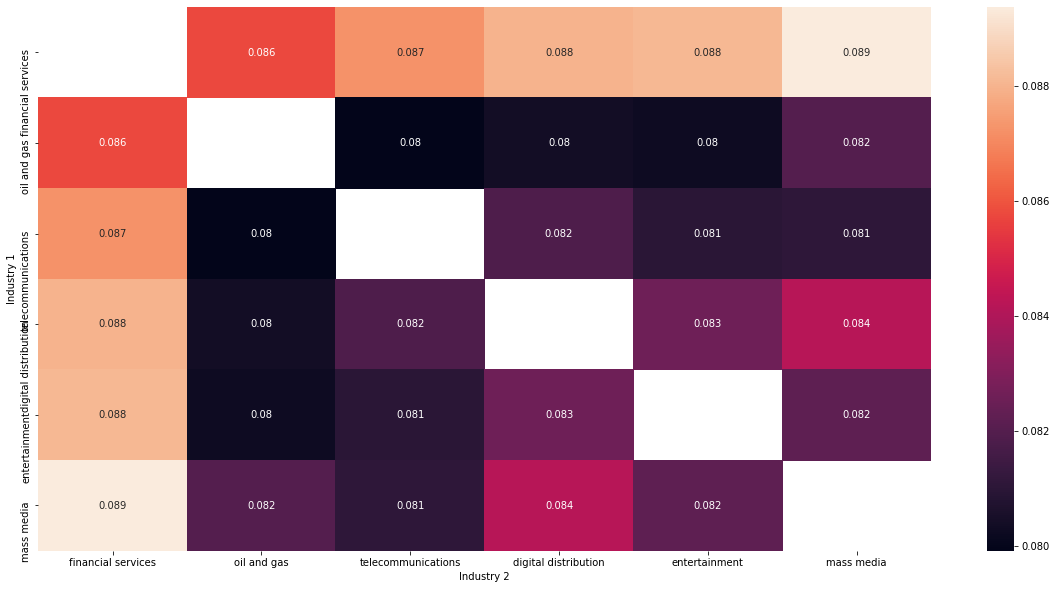

In [113]:
# Plot the heatmap
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20, 10))
ax = sns.heatmap(pivot_data, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);